<a href="https://colab.research.google.com/github/adib0073/Educative_SSDS_course/blob/main/notebooks/OpenCV_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#! pip install opencv-python
# LinK : https://pypi.org/project/opencv-python/
import cv2
print('opencv:',cv2.__version__)

#! pip install numpy 
#! pip install matplotlib
#! pip install pandas

import numpy as np
print('numpy:',np.__version__)

import matplotlib
import matplotlib.pyplot as plt
print('matplotlib:',matplotlib.__version__)

import pandas as pd
print('pandas:',pd.__version__)

print('So, these are the package versions I will be using throughout.')

opencv: 4.6.0
numpy: 1.21.6
matplotlib: 3.2.2
pandas: 1.3.5
So, these are the package versions I will be using throughout.


#### Downloading an image and displaying using OpenCV

In [7]:
!curl -O https://raw.githubusercontent.com/adib0073/MUST_ACADEMY-Computer_Vision/master/Notebooks/dataset/car.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 64262  100 64262    0     0   756k      0 --:--:-- --:--:-- --:--:--  756k


[[[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 ...

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]]


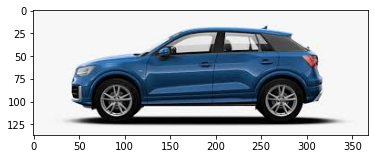

In [10]:
image = cv2.imread('car.png')
print(image)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

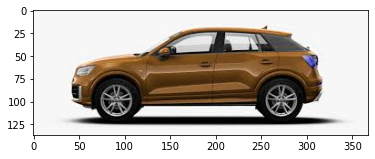

In [11]:
# Without changing color to RGB and displaying in BGR format
plt.imshow(image)


(137, 368, 3)


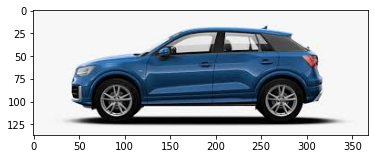

In [12]:
# Utility function to display images
def show_image(img, fig_size = None):
    print(img.shape)
    img = img.astype('uint8')
    
    if fig_size is not None:
        plt.figure(figsize=fig_size)
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
show_image(image)

#### Image Dimensions and Data Types

In [13]:
print('Shape:',image.shape)
print('Data type:', type(image))
print('Each element type:',image.dtype)
print('max pixel value:', np.max(image))
print('min pixel value:', np.min(image))

Shape: (137, 368, 3)
Data type: <class 'numpy.ndarray'>
Each element type: uint8
max pixel value: 255
min pixel value: 0


#### Color Images and Extracting Channels from an Image

In [14]:
# Utility Functions - to convert coloured images to gray scale
def to_gray_scale(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray

(137, 368)


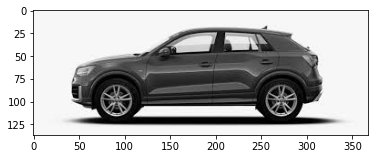

(137, 368)


In [15]:
gray_scaled_image = to_gray_scale(image)
show_image(gray_scaled_image)
print(gray_scaled_image.shape)

(137, 368)


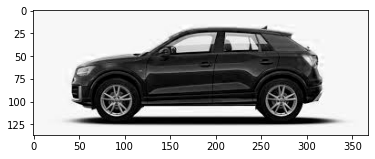

(137, 368)


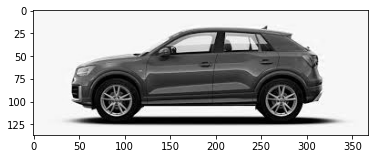

(137, 368)


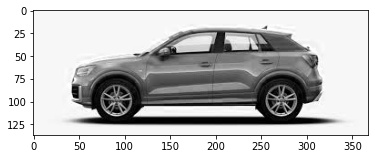

In [16]:
# Monochrome Images
# Utility Functions - to convert coloured images to monochrome image
def to_monochrome(img, channel = 'R'):
    if channel == 'R':
        monochrome = img[:,:,2]
    if channel == 'G':
        monochrome = img[:,:,1]
    if channel == 'B':
        monochrome = img[:,:,0]
        
    return monochrome

# Red Monochrome
show_image(to_monochrome(image,channel = 'R'))
# Green Monochrome
show_image(to_monochrome(image,channel = 'G'))
# Blue Monochrome
show_image(to_monochrome(image,channel = 'B'))

In [17]:
# Utility Functions - to swap colour channels
def swap_color_channels(img, channel1 = 'R', channel2 = 'B'):
    duplicate = img.copy()
    
    dict_color = {'R':2,'G':1,'B':0}
    
    temp = duplicate[:,:,dict_color[channel1]].copy()
    duplicate[:,:,dict_color[channel1]] = duplicate[:,:,dict_color[channel2]].copy()
    duplicate[:,:,dict_color[channel2]] = temp.copy()
        
    return duplicate

(137, 368, 3)


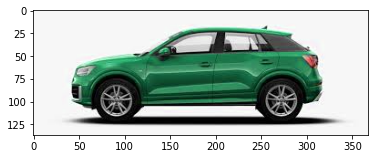

(137, 368, 3)


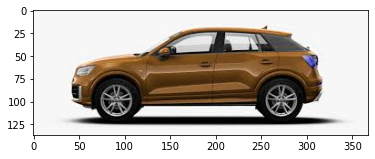

In [18]:
# Swap Blue and Green channels
show_image(swap_color_channels(image,channel1 = 'B', channel2 = 'G'))

# Swap Blue and Red channels
show_image(swap_color_channels(image,channel1 = 'B', channel2 = 'R'))

#### Cropping Images

(137, 368, 3)


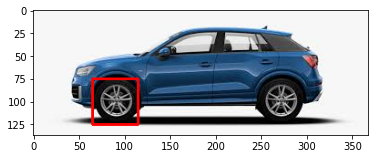

(50, 50, 3)


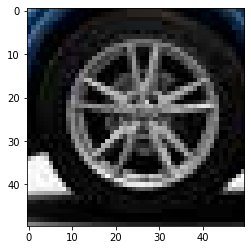

In [19]:
# Utility function to highlight region of interests
def draw_bounding_box(img, x,y,w,h):
    dupicate = img.copy()
    cv2.line(dupicate, (x,y), (x+w,y), color = (0,0,255), thickness = 2)
    cv2.line(dupicate, (x,y), (x,y+h), color = (0,0,255), thickness = 2)
    cv2.line(dupicate, (x,y+h), (x+w,y+h), color = (0,0,255), thickness = 2)
    cv2.line(dupicate, (x+w,y), (x+w,y+h), color = (0,0,255), thickness = 2)
    
    return dupicate

show_image(draw_bounding_box(image, x = 65, y =75, w = 50, h = 50)) 
# Pixel position of the top-left coordinate of the bounding box is represented by x and y
# Height and weight of the bounding box is represented by w and h

x = 65; y =75; w = 50; h = 50;
cropped_img = image[y:y+h, x:x+w]
show_image(cropped_img)

#### Image Statistics

Max pixel value: 255
Min pixel value: 0
Mean pixel value: 169.00864804823865
Median pixel value: 245.0

Pixel Intensity Distribution:


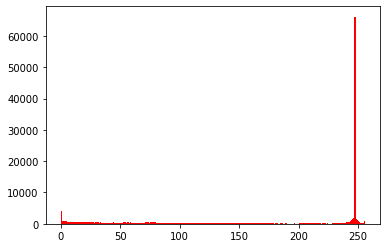

In [20]:
def image_stats(img):
    max = np.max(img)
    print('Max pixel value:', max)
    min = np.min(img)
    print('Min pixel value:', min)
    mean = np.mean(img)
    print('Mean pixel value:', mean)
    median = np.median(img)
    print('Median pixel value:', median)
    
    print('\nPixel Intensity Distribution:')
    plt.hist(img.ravel(),256,[0,256], color='r') 
    plt.show()    

image_stats(image)


#### Image Transformations



Rotate by 90 degress anti-clockwise
(368, 137, 3)


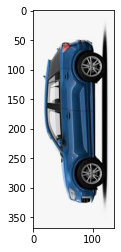

Rotate by 90 degress clockwise
(368, 137, 3)


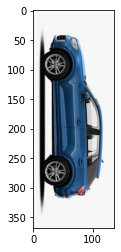

In [21]:
# Rotation
# For simplicity we will use scipy package
from scipy import ndimage

print("Rotate by 90 degress anti-clockwise")
show_image(ndimage.rotate(image,90))

print("Rotate by 90 degress clockwise")
show_image(ndimage.rotate(image,-90))

Mirror horizontally
(137, 368, 3)


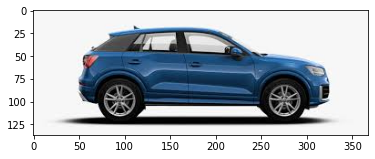

Mirror Vertically
(137, 368, 3)


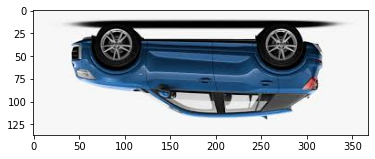

In [22]:
# Mirroring
print("Mirror horizontally")
show_image(np.flip(image,1))

print("Mirror Vertically")
show_image(np.flip(image,0))

(50, 50, 3)


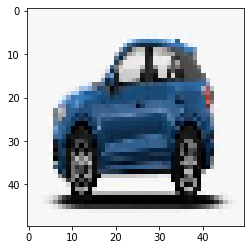

In [23]:
# Resizing
show_image(cv2.resize(image,(50,50)))
